In [1]:
# import packages
import numpy
import scipy
import sklearn
import pandas
import matplotlib

In [2]:
# import wine data set, classification algorithms
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from __future__ import division
from matplotlib import pyplot

In [3]:
# load and assign wine data set 
wine = datasets.load_wine()

In [4]:
# assign features and labels
features = wine.data
labels = wine.target

In [5]:
# print data set


In [6]:
# partition data set for training and testing (90/10)
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.1)

In [7]:
# print traning and testing data


In [16]:
# support vector machine [(kernel = "rbf") as default]
classifier = svm.SVC()
# train svm
classifier.fit(train_features, train_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
# make predictions
predictions = classifier.predict(test_features)
print predictions

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1]


In [14]:
# cross-validate
score = 0
for i in range(len(predictions)):
    if predictions[i] == test_labels[i]:
        score += 1
print score/len(predictions)

# not very good, random prediction = 33% or .033

0.5


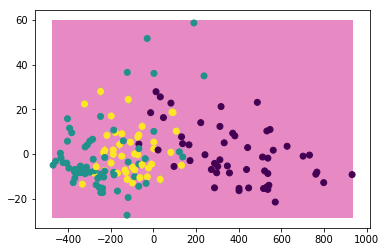

In [15]:
# pca
pca = PCA(n_components = 2)
transformed = pca.fit_transform(train_features)
classifier.fit(transformed, train_labels)


# decision boundary from linear SVM using principal components as measure along axes
h = 0.2
x_min, x_max = transformed[:,0].min() - 1, transformed[:, 0].max() + 1
y_min, y_max = transformed[:,1].min() - 1, transformed[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))
Z = classifier.predict(numpy.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pyplot.contourf(xx,yy,Z,cmap = pyplot.cm.Set2)
pyplot.scatter(transformed[:,0], transformed[:,1], c = train_labels)
pyplot.show()

In [ ]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h),
                         numpy.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, classifier, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = classifier.predict(numpy.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z)
    return out




model = svm.SVC(kernel='rbf', gamma=0.7)
ax = pyplot.plot("PC 1", "PC 2")
title = 'SVC with RBF kernel'
X0, X1 = transformed[:, 0], transformed[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, classifier, xx, yy, cmap = pyplot.cm.coolwarm, alpha = 0.8)
ax.scatter(X0, X1, c = train_labels, cmap = pyplot.cm.coolwarm, s = 20, edgecolors = 'k')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)

pyplot.show()